<a href="https://colab.research.google.com/github/raspberryscorn/2_5_1/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd "/content/drive/MyDrive/ddeep/bhban_ai/SECTION_2/Chapter_5/2_5_1"

/content/drive/MyDrive/ddeep/bhban_ai/SECTION_2/Chapter_5/2_5_1


In [ ]:
import os
os.listdir()

['License.txt',
 'README.md',
 'data',
 'data_reader.py',
 'data_reader.ipynb',
 '__pycache__',
 '.ipynb_checkpoints',
 'main.py',
 'train_history.png',
 'accuracy_history.png',
 'main.ipynb']

In [ ]:
os.listdir("data")

['학생건강검사 결과분석 rawdata_서울_2015.csv']



Data Read Done!
Training X Size : (7745, 3)
Training Y Size : (7745,)
Test X Size : (1937, 3)
Test Y Size : (1937,)


************ TRAINING START ************
Epoch 1/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5356 - loss: 1.0481 - val_accuracy: 0.6329 - val_loss: 0.8667
Epoch 2/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6620 - loss: 0.7955 - val_accuracy: 0.6515 - val_loss: 0.7346
Epoch 3/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6706 - loss: 0.6956 - val_accuracy: 0.6768 - val_loss: 0.7079
Epoch 4/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6826 - loss: 0.6786 - val_accuracy: 0.6815 - val_loss: 0.7068
Epoch 5/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6888 - loss: 0.6602 - val_accuracy: 0.6913 - val_loss: 0.6838
Epoch 6/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6851 - loss: 0.6630 - val_accuracy: 0.6902 - val_loss: 0.6788
Epoch 7/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6936

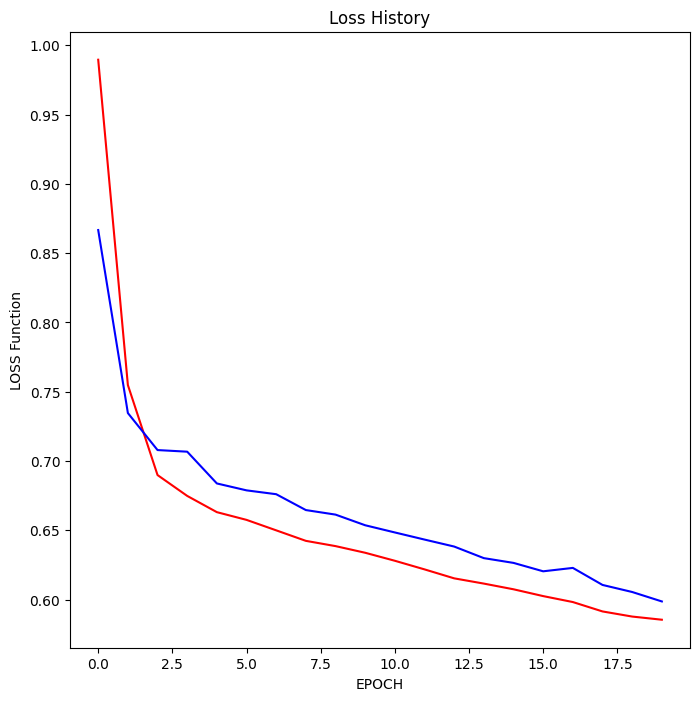

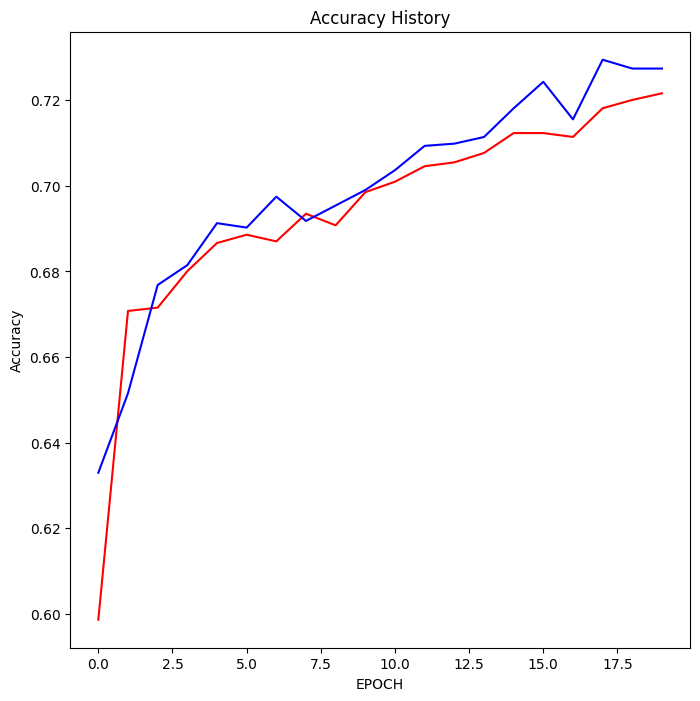

In [ ]:
from tensorflow import keras
import data_reader

# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 20  # 예제 기본값은 20입니다.

# 데이터를 읽어옵니다.
dr = data_reader.DataReader()

# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Dense(3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(3, activation='softmax')
])

# 인공신경망을 컴파일합니다.
model.compile(optimizer="adam", metrics=["accuracy"],
              loss="sparse_categorical_crossentropy")

# 인공신경망을 학습시킵니다.
print("************ TRAINING START ************")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(history)